<a href="https://colab.research.google.com/github/Aya-Osamaa/Disease-Risk-Habits-Dashboard/blob/main/Health_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/health_lifestyle_classification.csv')

In [ ]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
alcohol_consumption,42387
caffeine_intake,33261
exercise_type,24969
insulin,15836
heart_rate,14003
gene_marker_flag,10474
income,8470
daily_steps,8329
blood_pressure,7669
bmi_estimated,0


In [ ]:
df.shape

(100000, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

In [ ]:
print("Skewness of numeric columns:")
for col in numeric_cols:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.3f}")


Skewness of numeric columns:
survey_code: 0.000
age: 0.001
height: 0.009
weight: 0.129
bmi: 0.421
bmi_estimated: 0.421
bmi_scaled: 0.421
bmi_corrected: 0.420
waist_size: 0.000
blood_pressure: 0.004
heart_rate: -0.022
cholesterol: -0.010
glucose: -0.007
insulin: 0.002
sleep_hours: 0.025
work_hours: -0.002
physical_activity: 0.308
daily_steps: 0.052
calorie_intake: 0.002
sugar_intake: 0.003
water_intake: 0.102
screen_time: 0.119
stress_level: -0.000
mental_health_score: 0.002
income: 0.189
meals_per_day: 0.001
electrolyte_level: 0.000
gene_marker_flag: 0.000
environmental_risk_score: 0.000
daily_supplement_dosage: -0.005


In [ ]:
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2905286879.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2905286879.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,Moderate,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [ ]:
df.shape

(100000, 48)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
bmi_estimated,0
bmi_scaled,0
bmi_corrected,0
waist_size,0


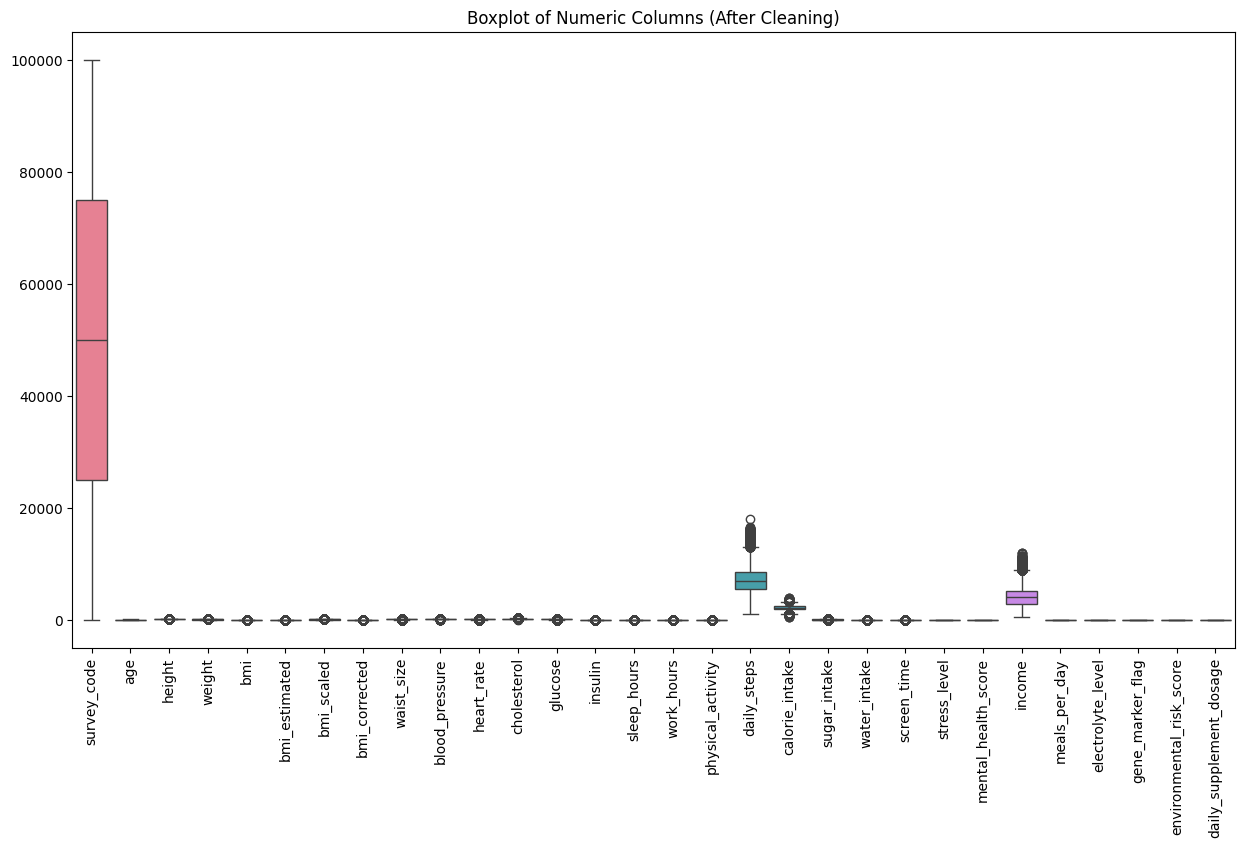

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns (After Cleaning)")
plt.show()

In [ ]:
cleaned_file = "cleaned_disease_risk.csv"
df.to_csv(cleaned_file, index=False)

from google.colab import files
files.download(cleaned_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
if constant_cols:
    print("Dropping constant columns (only one unique value):", constant_cols)
    df.drop(columns=constant_cols, inplace=True)
else:
    print("No constant-value columns found.")

Dropping constant columns (only one unique value): ['electrolyte_level', 'gene_marker_flag', 'environmental_risk_score']


In [ ]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,Moderate,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,Low,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,Low,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy



Checking correlation between BMI-related columns...


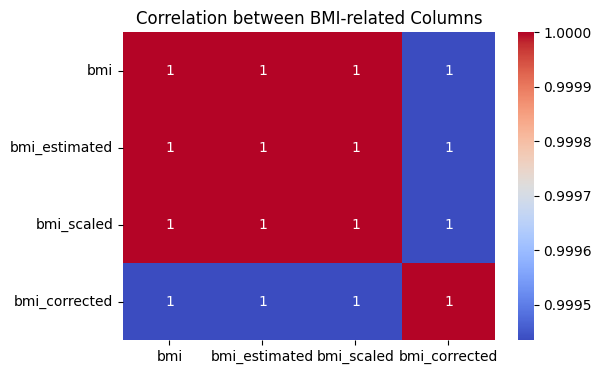

In [ ]:
bmi_cols = ["bmi", "bmi_estimated", "bmi_scaled", "bmi_corrected"]
bmi_cols = [col for col in bmi_cols if col in df.columns]

if bmi_cols:
    print("\nChecking correlation between BMI-related columns...")
    corr_matrix = df[bmi_cols].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation between BMI-related Columns")
    plt.show()

In [ ]:
bmi_cols = ["bmi", "bmi_estimated", "bmi_scaled", "bmi_corrected"]
existing_bmi_cols = [col for col in bmi_cols if col in df.columns]

if existing_bmi_cols:
    print("\nBMI-related columns found:", existing_bmi_cols)

    if "bmi_corrected" in existing_bmi_cols:
        to_drop = [col for col in existing_bmi_cols if col != "bmi_corrected"]
        if to_drop:
            print("Dropping BMI columns (keeping only 'bmi_corrected'):", to_drop)
            df.drop(columns=to_drop, inplace=True)
    else:
        print("Warning: 'bmi_corrected' not found, keeping existing BMI columns.")
else:
    print("No BMI-related columns found.")


BMI-related columns found: ['bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']
Dropping BMI columns (keeping only 'bmi_corrected'): ['bmi', 'bmi_estimated', 'bmi_scaled']


In [ ]:
df.head()

,survey_code,age,gender,height,weight,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,...,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.989117,72.165130,118.264254,60.749825,214.580523,...,High,Poor,No,High,5,Moderate,No,Yes,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.511417,85.598889,117.917986,66.463696,115.794002,...,Moderate,Moderate,No,High,5,High,Yes,No,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.587429,90.295030,123.073698,76.043212,138.134787,...,High,Good,Yes,High,4,Moderate,No,No,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.177109,100.504211,148.173453,68.781981,203.017447,...,Low,Moderate,No,High,1,Moderate,No,Yes,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.844299,69.021150,150.613181,92.335358,200.412439,...,Low,Moderate,Yes,High,1,High,Yes,Yes,0.332622,healthy


**Encoding & ML Model-Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

label_encoders = {}
for col in df.select_dtypes(exclude=[np.number]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
target_col = "target"
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = RandomForestClassifier(
    n_estimators=300, random_state=42, class_weight="balanced"
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 70.09%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5981
           1       0.70      1.00      0.82     14019

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


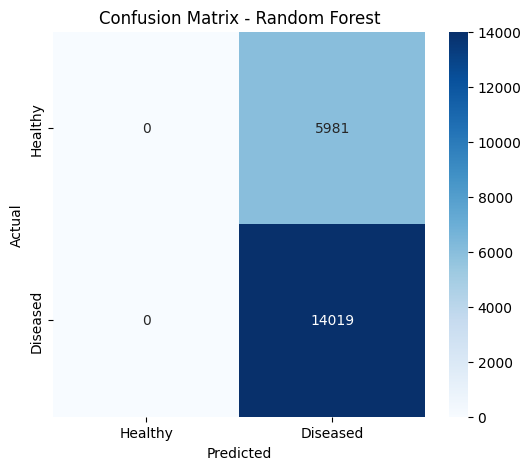

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "Diseased"],
            yticklabels=["Healthy", "Diseased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
df.head()

,survey_code,age,gender,height,weight,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,...,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,daily_supplement_dosage,target
0,1,56,1,173.416872,56.886640,18.989117,72.165130,118.264254,60.749825,214.580523,...,0,2,0,0,5,1,0,1,-2.275502,1
1,2,69,0,163.207380,97.799859,36.511417,85.598889,117.917986,66.463696,115.794002,...,2,1,0,0,5,0,1,0,6.239340,1
2,3,46,1,177.281966,80.687562,25.587429,90.295030,123.073698,76.043212,138.134787,...,0,0,1,0,4,1,0,0,5.423737,1
3,4,32,0,172.101255,63.142868,21.177109,100.504211,148.173453,68.781981,203.017447,...,1,1,0,0,1,1,0,1,8.388611,1
4,5,60,0,163.608816,40.000000,14.844299,69.021150,150.613181,92.335358,200.412439,...,1,1,1,0,1,0,1,1,0.332622,1


**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
regression_target = "bmi_corrected"

X = df.drop(columns=[regression_target, "target"])
y = df[regression_target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.9843
RMSE: 0.7501


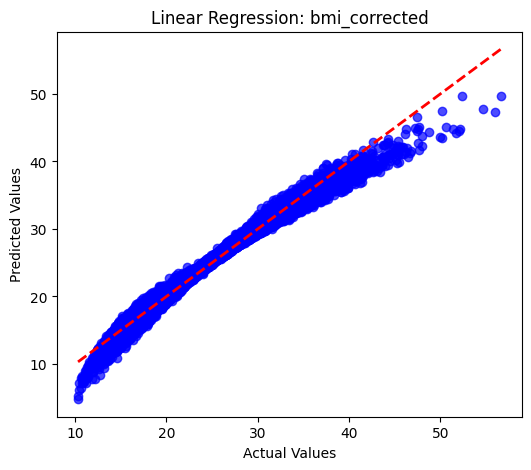

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Linear Regression: {regression_target}")
plt.show()

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6988

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6023
           1       0.70      1.00      0.82     13977

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.57     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


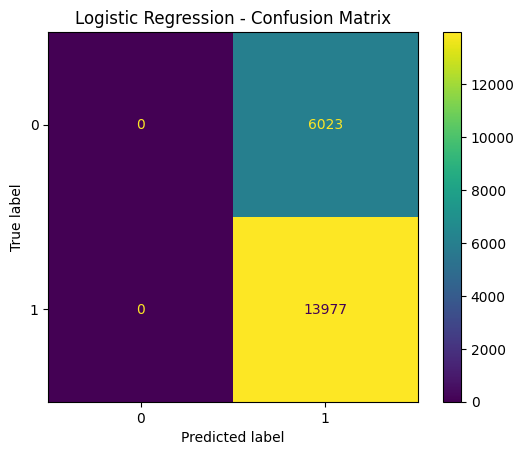

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()